In [1]:
import crosspower as cp #branch master
import FisherCl as fcl
#import camb

# set plotting to be in the notebook instead of its own qt window
%matplotlib inline

In [2]:
# get my derivatives
# load saved Fobj

import FisherCl as fcl
import crosspower as cp
import pickle
filehandler = open('Fisher_4_4G.obj','r') # accuracyBoost=3,doNorm=True,lmax=1000, epsrel = 1.49e-6; from FisherCl branch master

Fobj = pickle.load(filehandler) 
lmin = Fobj.lmin
lmax = Fobj.lmax
nMaps = Fobj.nBins + 1
nCosParams = Fobj.nParams - Fobj.nBins
ells = Fobj.ells
obsNames = Fobj.obsNames
paramList = Fobj.paramList

print Fobj.obsList
print Fobj.obsNames
print Fobj.paramList

[  0.   1.   2.   3.   4.   6.   7.   8.   9.  12.  13.  14.  18.  19.  24.]
['k,k', 'k,g1', 'k,g2', 'k,g3', 'k,g4', 'g1,g1', 'g1,g2', 'g1,g3', 'g1,g4', 'g2,g2', 'g2,g3', 'g2,g4', 'g3,g3', 'g3,g4', 'g4,g4']
['ombh2', 'omch2', 'cosmomc_theta', 'As', 'ns', 'tau', 'mnu', 'w', 'bin1', 'bin2', 'bin3', 'bin4']


In [3]:
print Fobj.binAs

[ 1.00103274  1.00099201  1.00099571  1.00099761]


# Plot the discrete derivatives

In [4]:
dClVecs = Fobj.dClVecs
print lmax
print lmin
print dClVecs.shape
print '(nCls,nParams,lmax-1) (or lmax-lmin+1 with lmin=2)'
nCls = nMaps*(nMaps+1)/2
print 'nCls:',nCls
nParams = nCosParams+Fobj.nBins
print 'nParams:',nParams

1000
2
(15, 12, 999)
(nCls,nParams,lmax-1) (or lmax-lmin+1 with lmin=2)
nCls: 15
nParams: 12


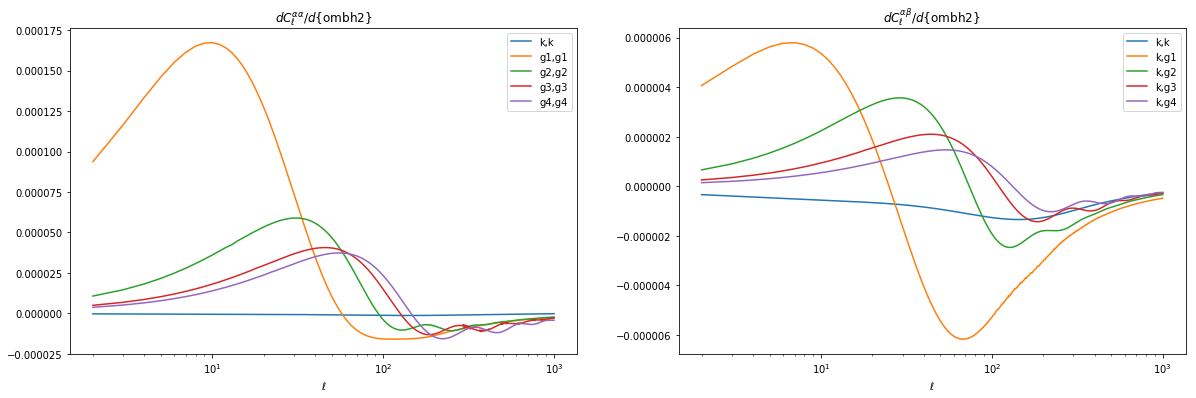

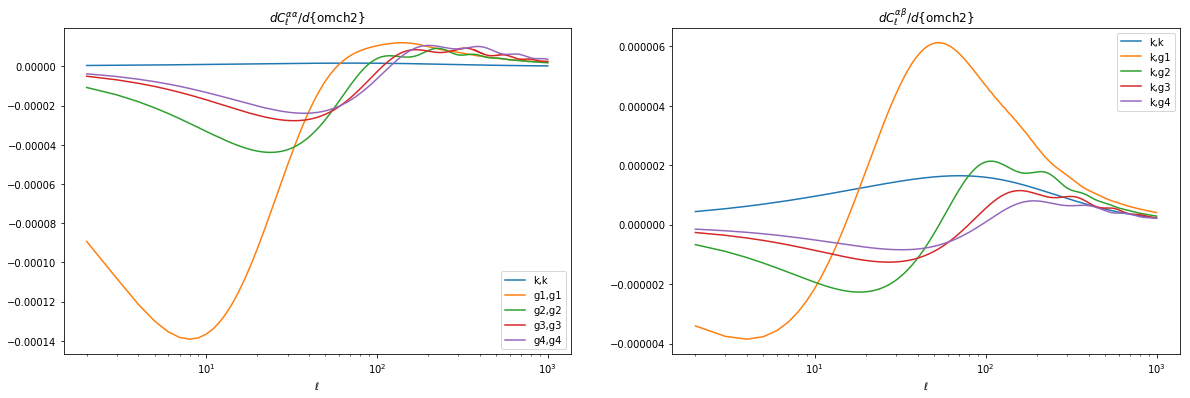

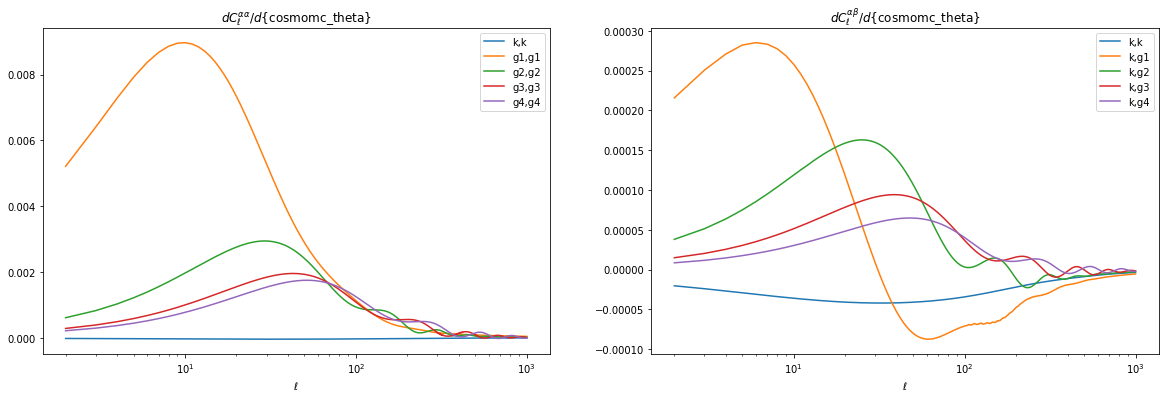

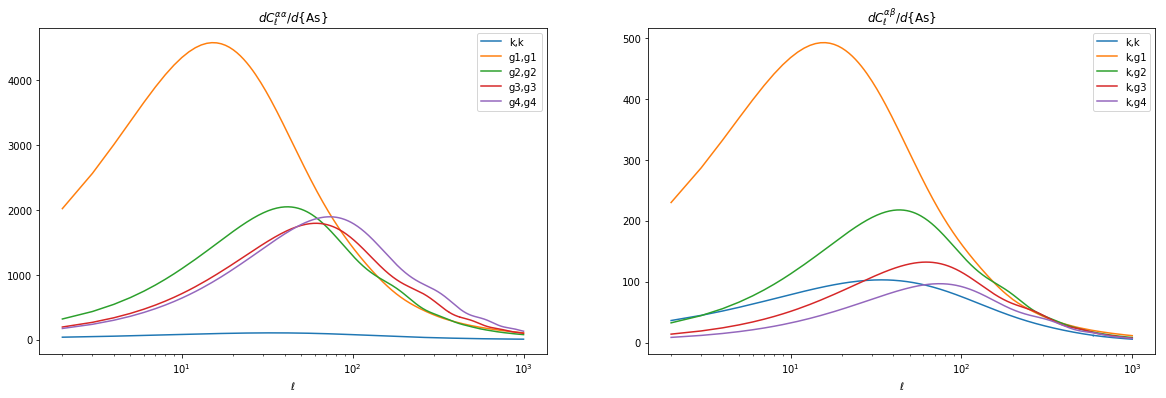

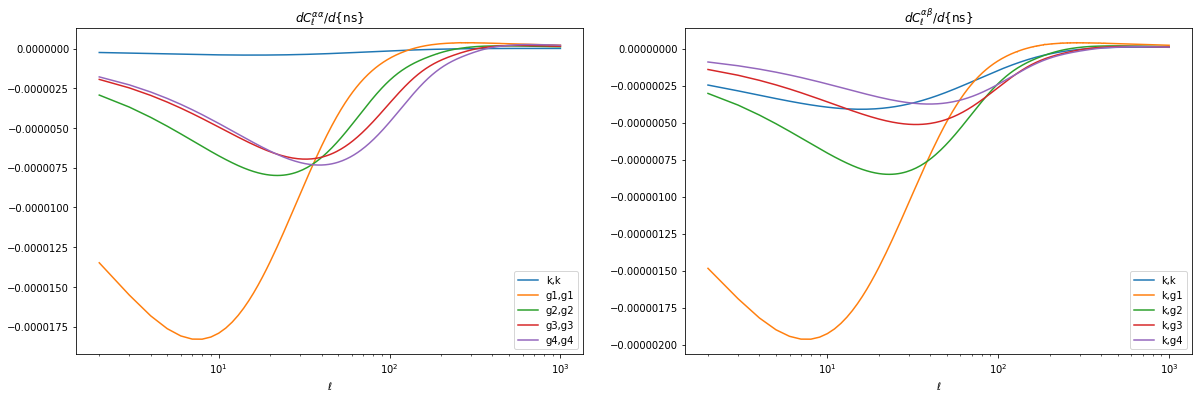

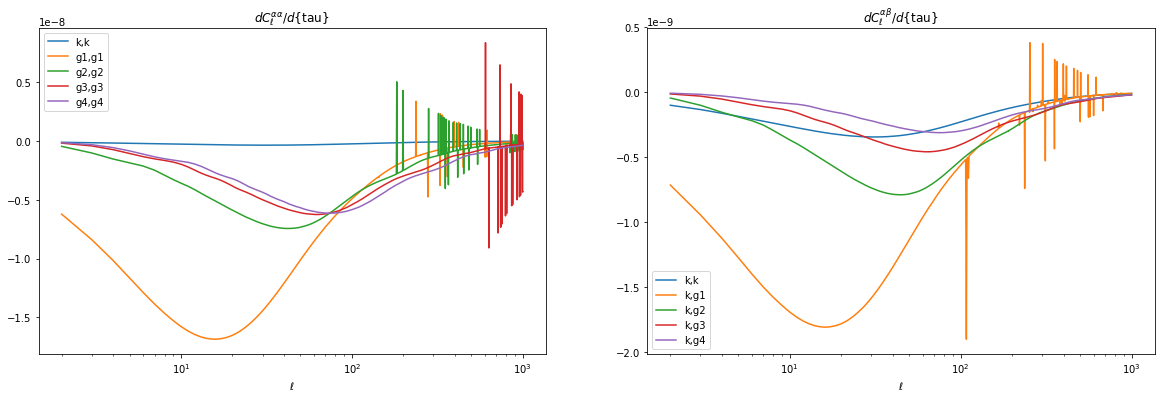

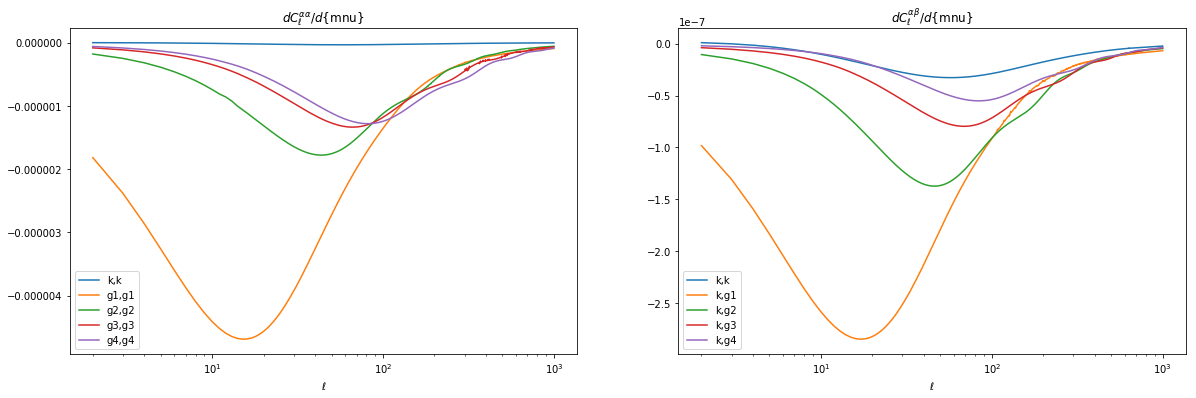

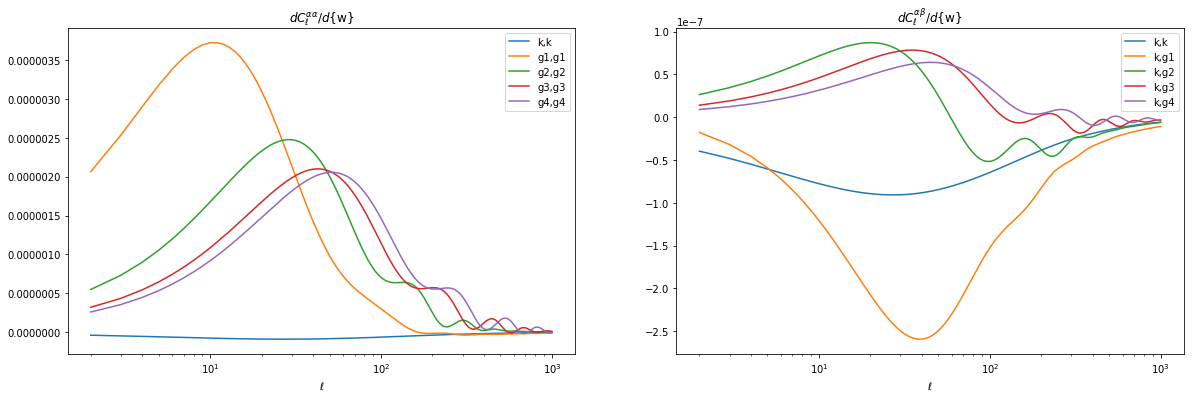

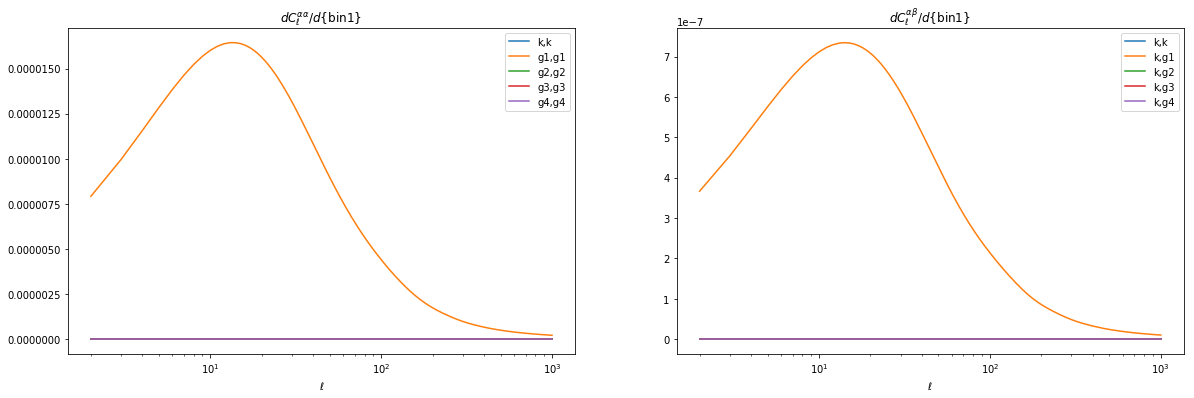

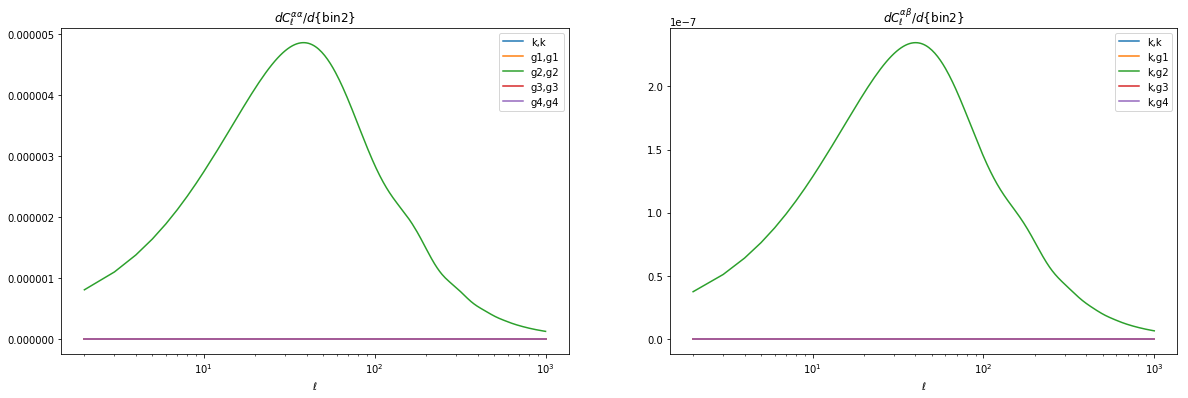

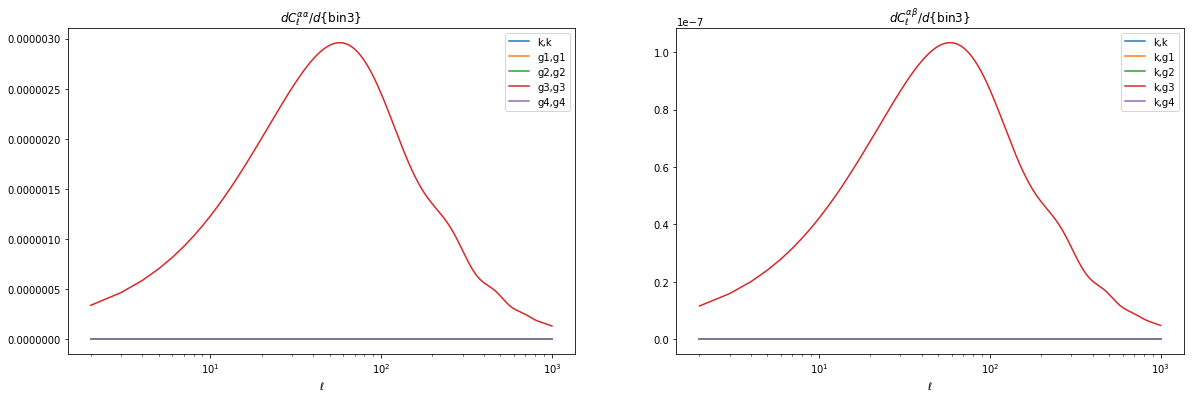

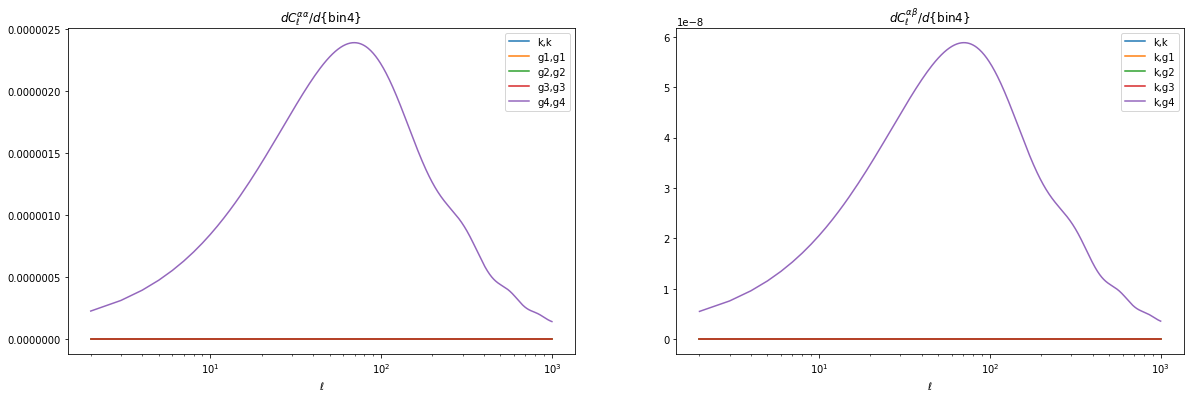

done


In [5]:
%matplotlib inline 
#qt
for paramNum in range(nParams):    
    #print paramNum
    #plt.figure()
    
    f, axarr = plt.subplots(1,2,figsize=(20,6))            
    for obs1 in range(nMaps):
        for obs2 in range(obs1,nMaps):
            if obs1 == 0 or obs1 == obs2:
                ClNum = obs1*nMaps+obs2 - obs1*(obs1+1)/2
                #obsName = obsNames[ClNum]
                
                if obs1 == 0: # cross with kappa
                    plt.sca(axarr[1])
                    plt.semilogx(ells,dClVecs[ClNum,paramNum],label=obsNames[ClNum])

                if obs1 == obs2: # auto power
                    plt.sca(axarr[0])
                    plt.semilogx(ells,dClVecs[ClNum,paramNum],label=obsNames[ClNum])

    plt.sca(axarr[1])            
    plt.title(r'$dC_\ell^{{\alpha\beta}}/d${{{0}}}'.format(paramList[paramNum]))
    plt.xlabel(r'$\ell$')
    plt.legend()
    
    plt.sca(axarr[0])            
    plt.title(r'$dC_\ell^{{\alpha\alpha}}/d${{{0}}}'.format(paramList[paramNum]))
    plt.xlabel(r'$\ell$')
    plt.legend()
    
    plt.show()
    
print 'done'

In [6]:
# load some of Byeonghee's stuff
ByeDir = 'Byeonghee_dat/'
nThetas = 8
# prepare some empty lists to laod data into
dClg1g1 = []
dClkg1  = []
dClkk   = []
for thetaNum in range(nThetas):
    dClg1g1.append( np.loadtxt(ByeDir+'dclg1g1_theta{0}.dat'.format(thetaNum+1)) )
    dClkg1.append( np.loadtxt(ByeDir+'dclkg1_theta{0}.dat'.format(thetaNum+1)) )
    dClkk.append( np.loadtxt(ByeDir+'dclkk_theta{0}.dat'.format(thetaNum+1)) )
    
# new dw files
newDw = False #True
wIndex = 6
if newDw:
    dClg1g1[wIndex] = np.loadtxt(ByeDir+'dclg1g1_dw.dat')
    dClkg1[wIndex] = np.loadtxt(ByeDir+'dclkg1_dw.dat')
    dClkk[wIndex] = np.loadtxt(ByeDir+'dclkk_dw.dat')

print dClg1g1[0].shape
print dClkg1[0].shape
print dClkk[0].shape

bElls = np.arange(2000)+2
print bElls[0]

(2000,)
(2000,)
(2000,)
2


In [7]:
"""t1 = np.loadtxt(ByeDir+'dclg1g1_theta6.dat')
t2 = np.loadtxt(ByeDir+'dclg1g1_dw.dat')
plt.plot(t2-t1)
plt.show()
"""

"t1 = np.loadtxt(ByeDir+'dclg1g1_theta6.dat')\nt2 = np.loadtxt(ByeDir+'dclg1g1_dw.dat')\nplt.plot(t2-t1)\nplt.show()\n"

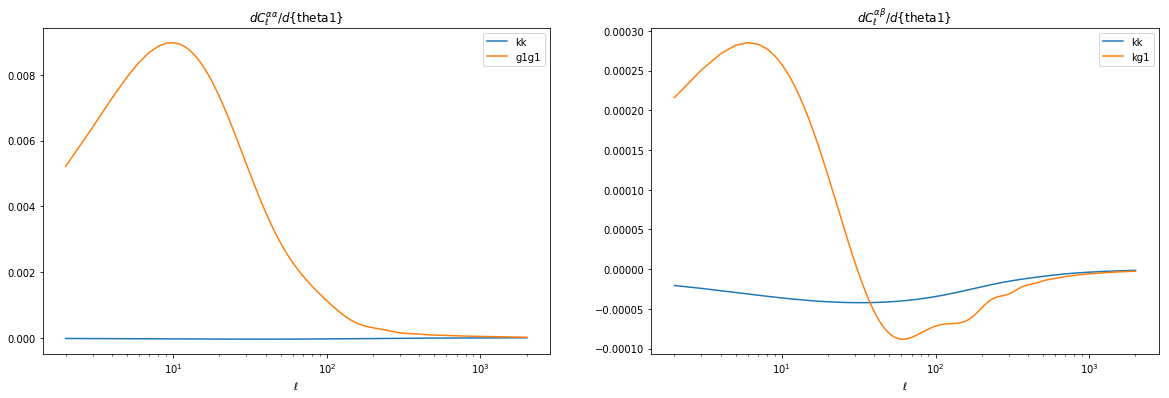

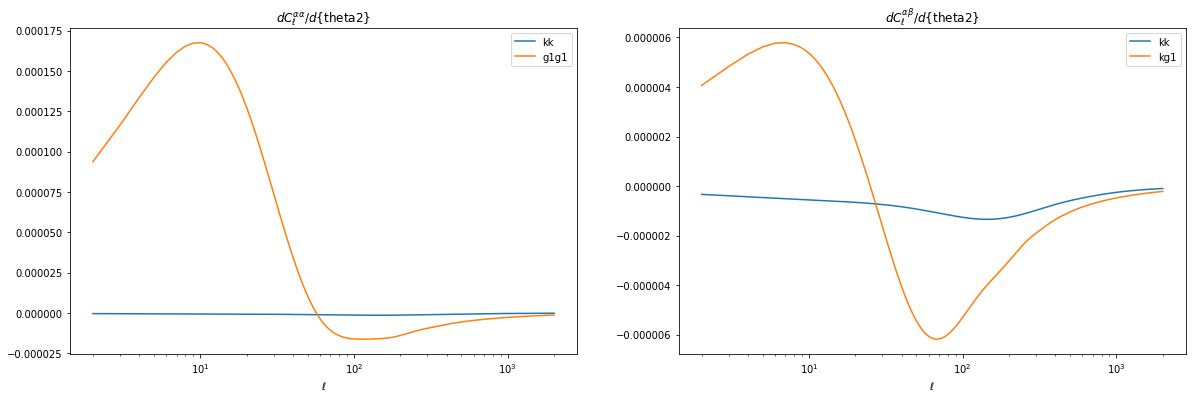

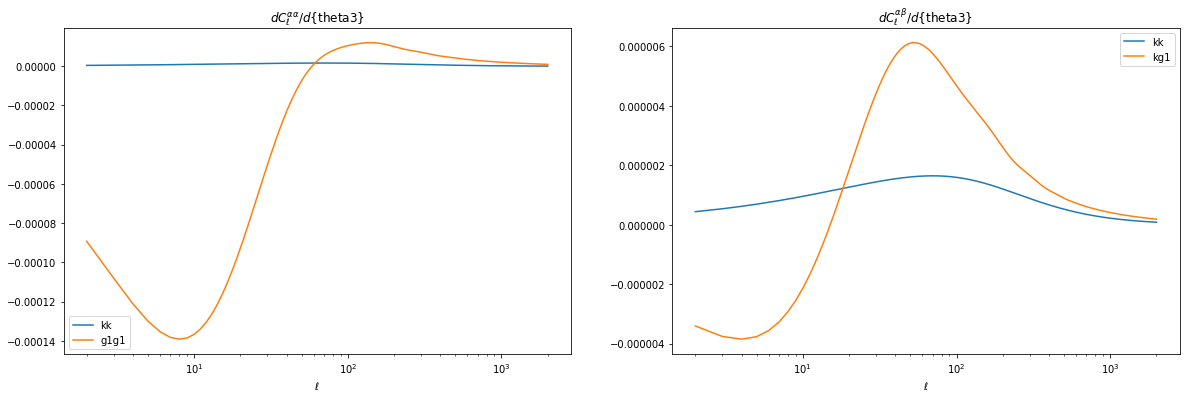

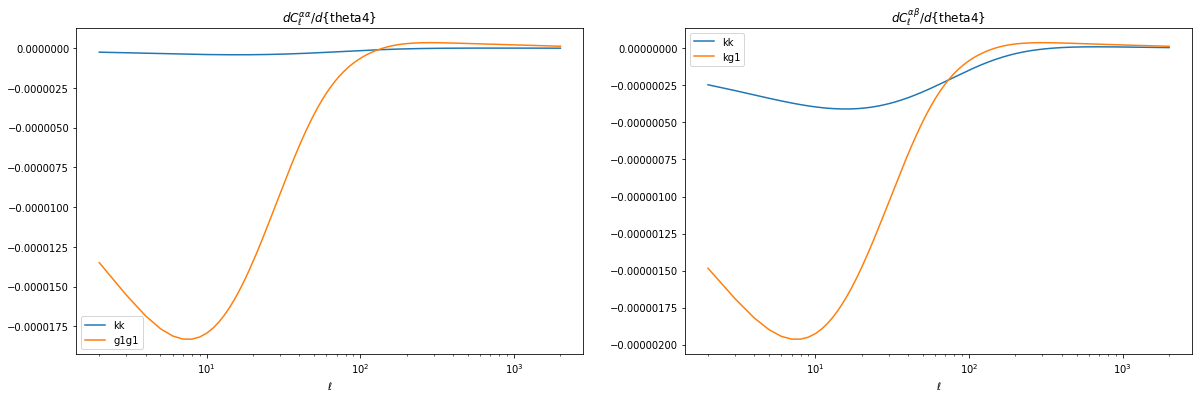

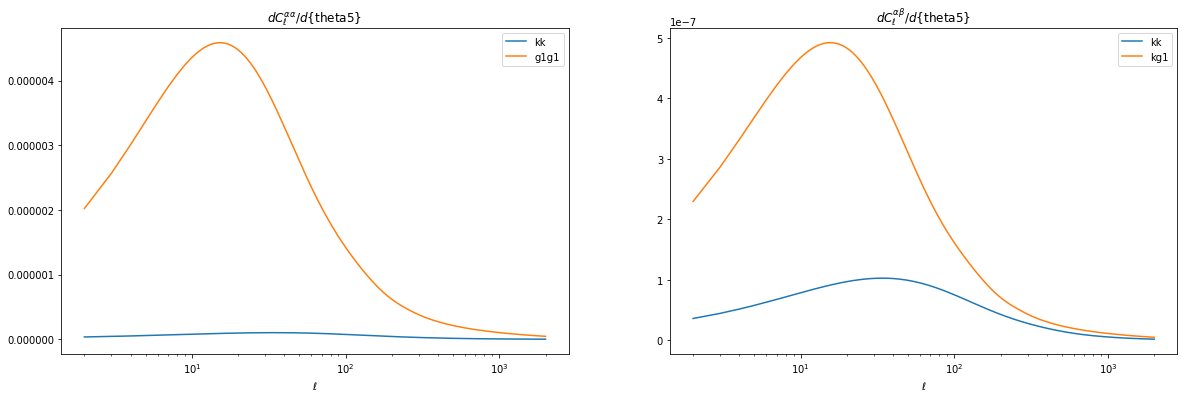

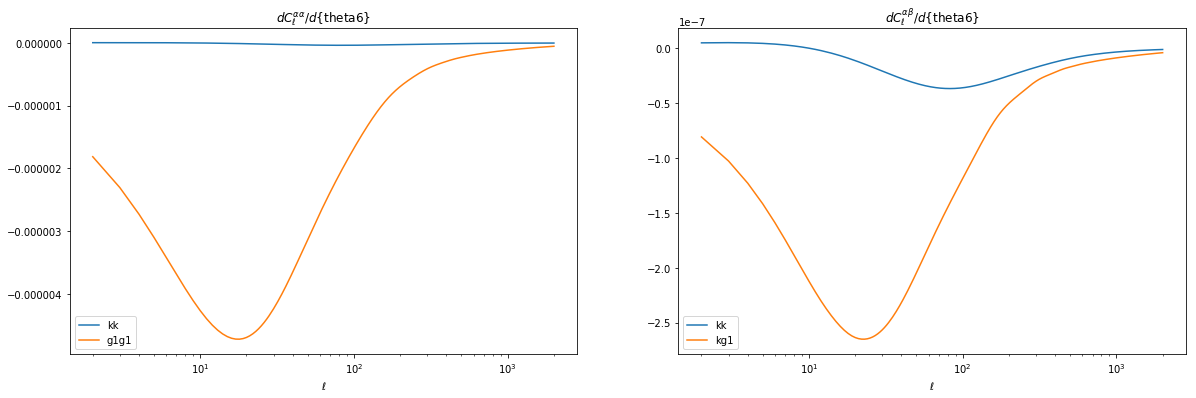

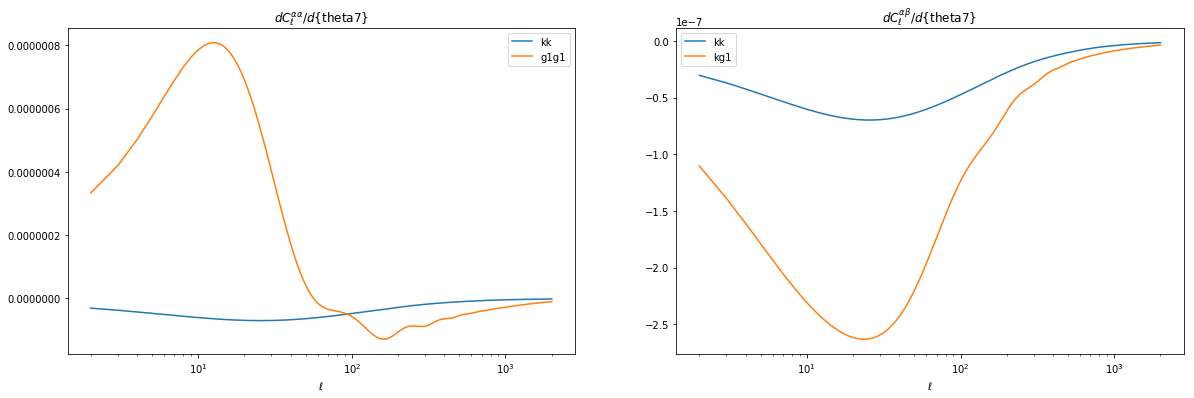

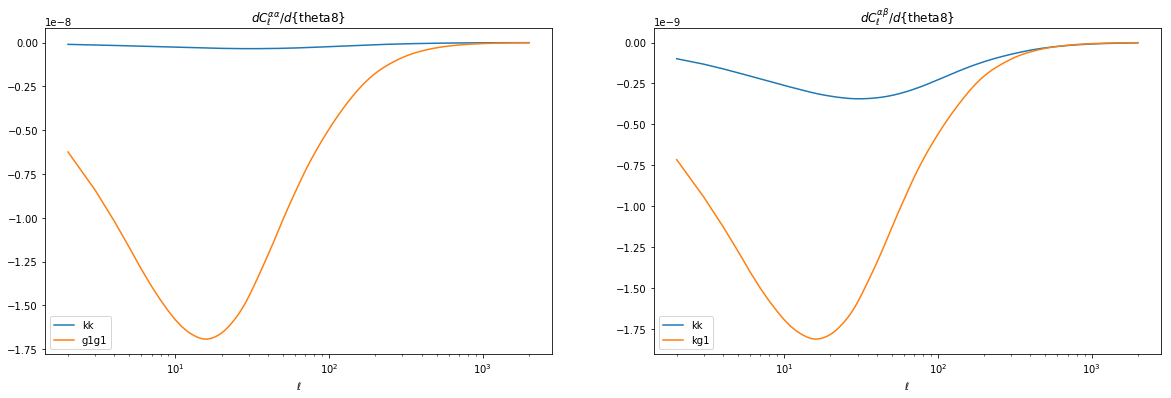

In [8]:
# plot them to make sure they look like I expect
%matplotlib inline
for thetaNum in range(nThetas):
    f, axarr = plt.subplots(1,2,figsize=(20,6)) 
    
    plt.sca(axarr[0])
    plt.semilogx(bElls,dClkk[thetaNum],label = 'kk')
    plt.semilogx(bElls,dClg1g1[thetaNum],label = 'g1g1')
    plt.title(r'$dC_\ell^{{\alpha\alpha}}/d${{theta{0}}}'.format(thetaNum+1))
    plt.xlabel(r'$\ell$')
    plt.legend()
    
    plt.sca(axarr[1])
    plt.semilogx(bElls,dClkk[thetaNum],label = 'kk')
    plt.semilogx(bElls,dClkg1[thetaNum],label = 'kg1')
    plt.title(r'$dC_\ell^{{\alpha\beta}}/d${{theta{0}}}'.format(thetaNum+1))
    plt.xlabel(r'$\ell$')
    plt.legend()
    
    plt.show()

In [9]:
# Dictionary to map my param numbers to Byeonghee's   (need to deal with 10^9 factor on As too)
ByeParams = ['cosmomc_theta','ombh2','omch2','ns','As','mnu','w','tau']
# my param numbers
print paramList
print ByeParams
ByeDict = {2:0,0:1,1:2,4:3,3:4,6:5,7:6,5:7}
for paramNum in range(8):
    print 'Zparam {0}, Bparam {1}'.format(paramList[paramNum],ByeParams[ByeDict[paramNum]])

['ombh2', 'omch2', 'cosmomc_theta', 'As', 'ns', 'tau', 'mnu', 'w', 'bin1', 'bin2', 'bin3', 'bin4']
['cosmomc_theta', 'ombh2', 'omch2', 'ns', 'As', 'mnu', 'w', 'tau']
Zparam ombh2, Bparam ombh2
Zparam omch2, Bparam omch2
Zparam cosmomc_theta, Bparam cosmomc_theta
Zparam As, Bparam As
Zparam ns, Bparam ns
Zparam tau, Bparam tau
Zparam mnu, Bparam mnu
Zparam w, Bparam w


In [10]:
# adjust scale on As values
dClg1g1[4] *=1e9
dClkg1[4]  *=1e9
dClkk[4]   *=1e9

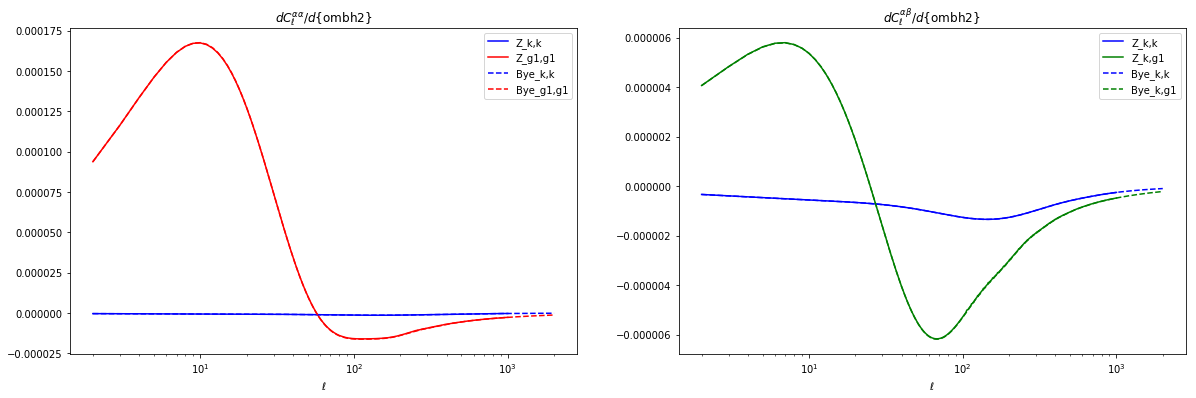

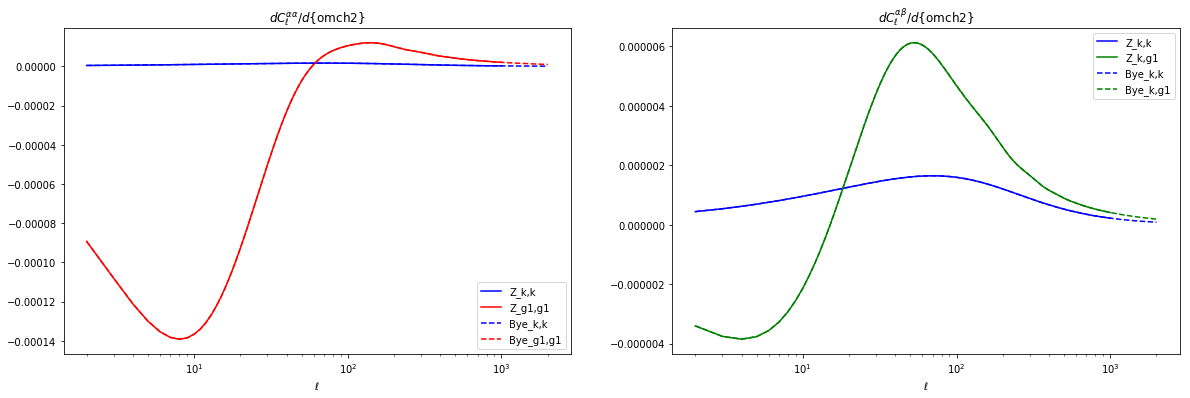

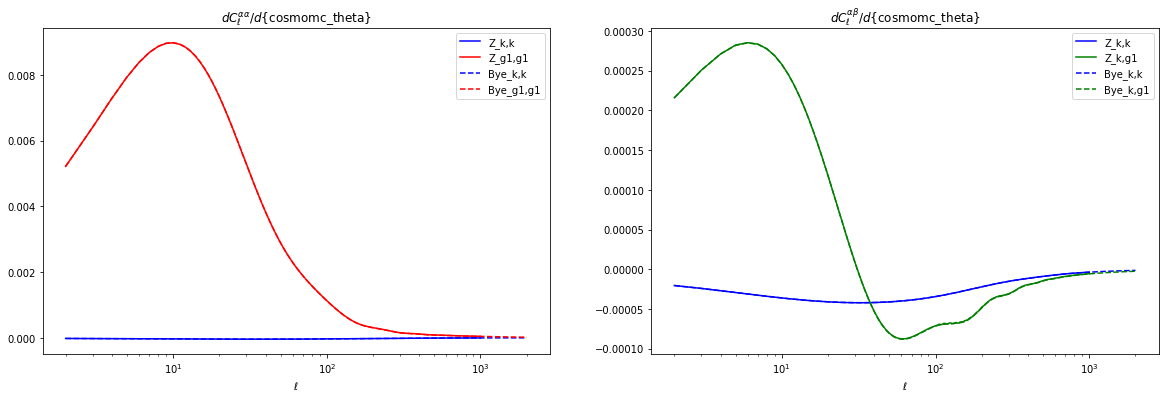

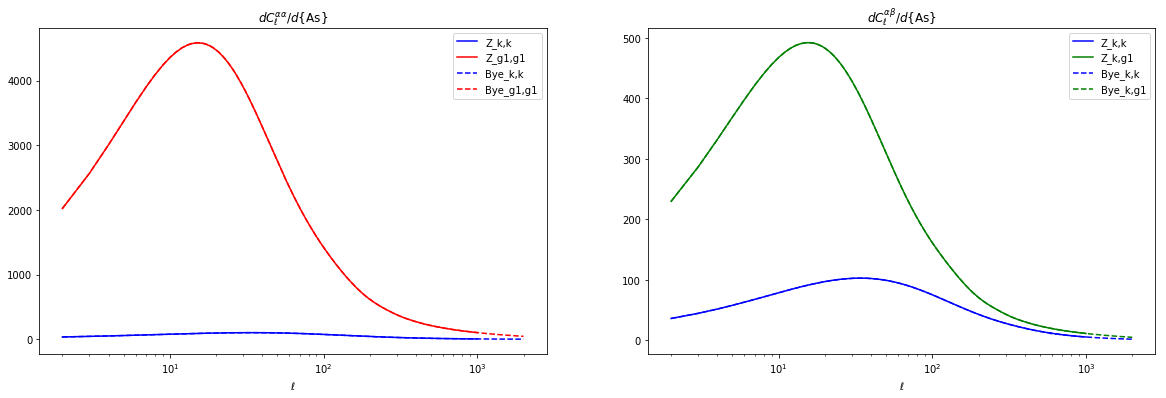

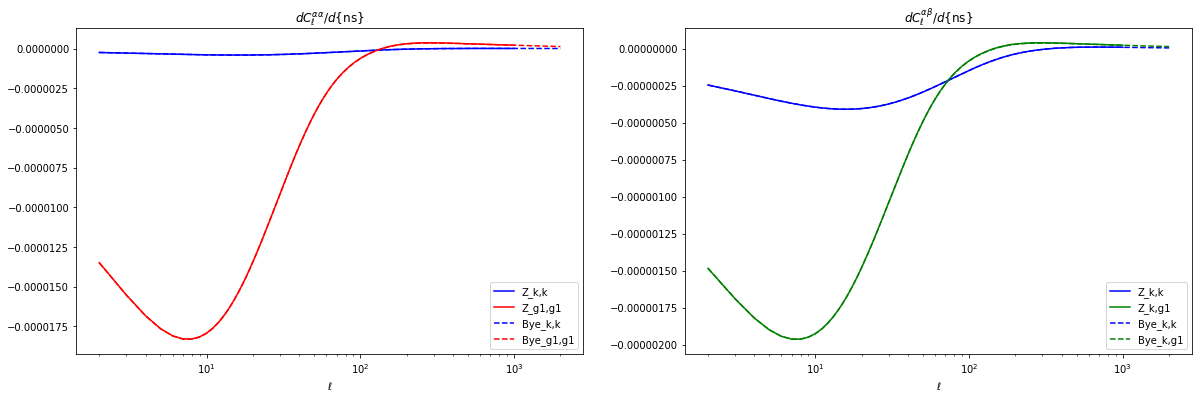

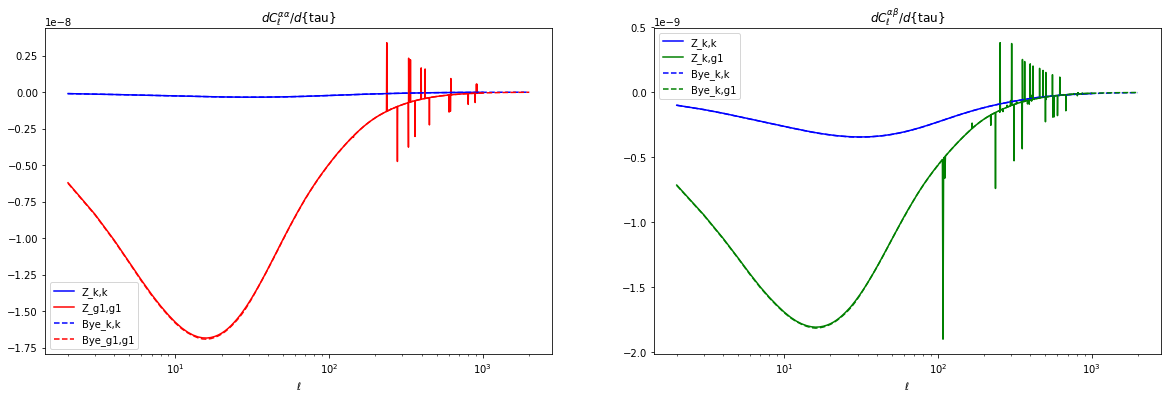

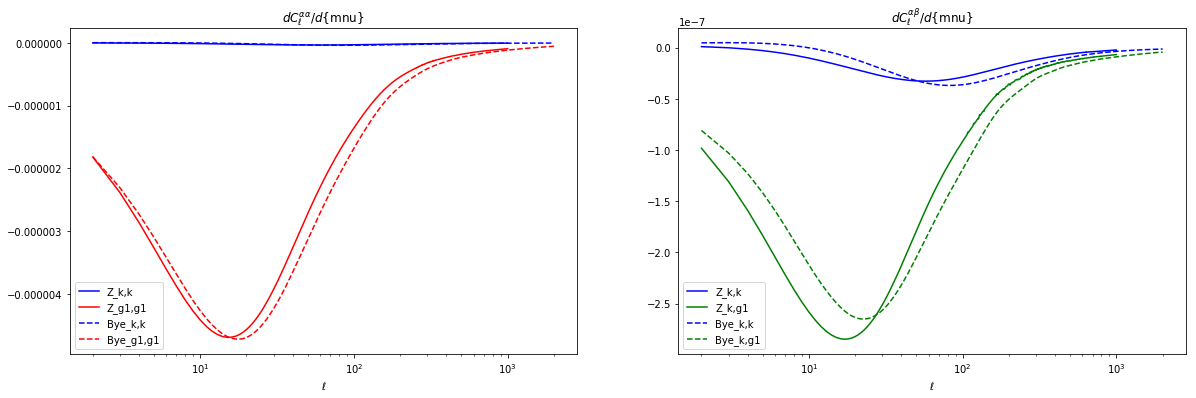

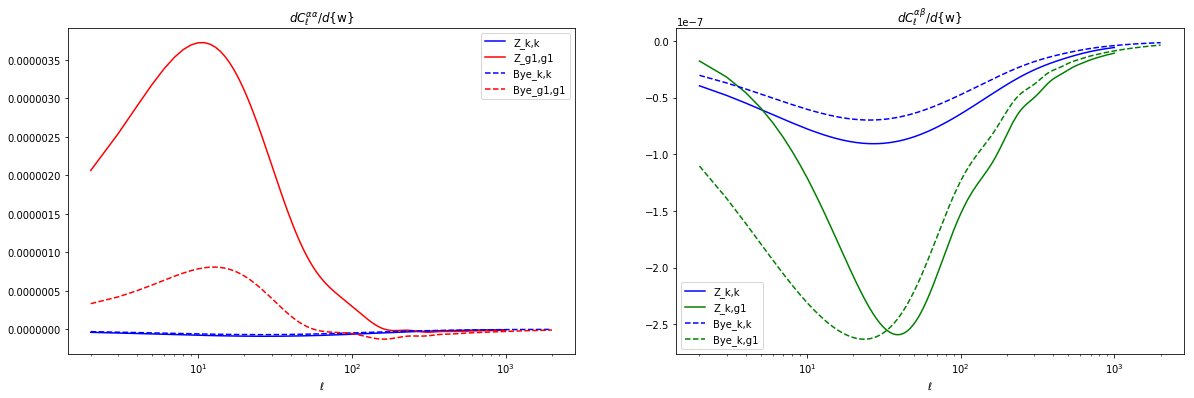

done


In [11]:
# make combined plot
#%matplotlib qt
colors = ['b','g','r','r','r','r']
nMaps = 5#2
obsToPlot = [0,1,5] # kk,kg1,g1g1
for paramNum in range(nCosParams):    
    f, axarr = plt.subplots(1,2,figsize=(20,6))            
    for obs1 in range(nMaps):
        for obs2 in range(obs1,nMaps):
            if obs1 == 0 or obs1 == obs2:
                ClNum = obs1*nMaps+obs2 - obs1*(obs1+1)/2
                #obsName = obsNames[ClNum]
                
                if obs1 == 0 and ClNum in obsToPlot: # cross with kappa
                    plt.sca(axarr[1])
                    plt.semilogx(ells,dClVecs[ClNum,paramNum],label='Z_'+obsNames[ClNum],color=colors[ClNum])

                if obs1 == obs2 and ClNum in obsToPlot: # auto power
                    plt.sca(axarr[0])
                    plt.semilogx(ells,dClVecs[ClNum,paramNum],label='Z_'+obsNames[ClNum],color=colors[ClNum])

    plt.sca(axarr[1])            
    plt.semilogx(bElls,dClkk[ByeDict[paramNum]],label = 'Bye_k,k',linestyle='--',color=colors[0])
    plt.semilogx(bElls,dClkg1[ByeDict[paramNum]],label = 'Bye_k,g1',linestyle='--',color=colors[1])
    plt.title(r'$dC_\ell^{{\alpha\beta}}/d${{{0}}}'.format(paramList[paramNum]))
    plt.xlabel(r'$\ell$')
    plt.legend()
    
    plt.sca(axarr[0])            
    plt.semilogx(bElls,dClkk[ByeDict[paramNum]],label = 'Bye_k,k',linestyle='--',color=colors[0])
    plt.semilogx(bElls,dClg1g1[ByeDict[paramNum]],label = 'Bye_g1,g1',linestyle='--',color=colors[2])
    plt.title(r'$dC_\ell^{{\alpha\alpha}}/d${{{0}}}'.format(paramList[paramNum]))
    plt.xlabel(r'$\ell$')
    plt.legend()
    
    plt.show()
    
print 'done'

In [12]:
# read Byeonghee's Cls
N = 4
Y = np.loadtxt(ByeDir+'cl_kki.dat')
cl_kki = Y[:,].reshape(N,-1)
# Why did he send kki?  This does not appear in our formulae anywhere!  Or is this really kiki?

Y = np.loadtxt(ByeDir+'cl_kg.dat')
cl_kg = Y[:,].reshape(N,-1)

Y = np.loadtxt(ByeDir+'cl_gg.dat')
cl_gg = Y[:,].reshape(N,-1)

Y = np.loadtxt(ByeDir+'cl_kk.dat')
cl_kk = Y

print cl_kki.shape,cl_kg.shape,cl_gg.shape,cl_kk.shape

(4, 2000) (4, 2000) (4, 2000) (2000,)


(5, 5, 999)
5


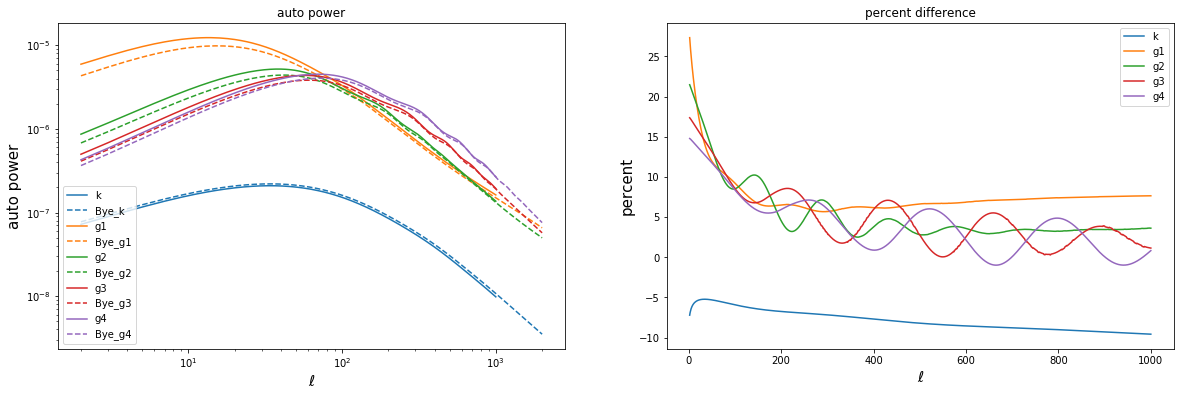

In [13]:
# plot auto power spectra
#%matplotlib notebook
f, axarr = plt.subplots(1,2,figsize=(20,6))
print Fobj.crossCls.shape
# auto power are on diagonal
print nMaps
labels = ['k','g1','g2','g3','g4']
bEllsMax = ells.size
for mapNum in range(nMaps):
    ZcrossCls = Fobj.crossCls[mapNum,mapNum]
    if mapNum == 0:
        BcrossCls = cl_kk
    else:
        BcrossCls = cl_gg[mapNum-1]
        
    plt.sca(axarr[0])
    plt.loglog(ells,ZcrossCls,label=labels[mapNum],color='C{0}'.format(mapNum))
    plt.loglog(bElls,BcrossCls,label='Bye_'+labels[mapNum],linestyle='--',color='C{0}'.format(mapNum))
    
    plt.sca(axarr[1])
    plt.plot(ells,(ZcrossCls-BcrossCls[:bEllsMax])*100/ZcrossCls,color='C{0}'.format(mapNum),label=labels[mapNum])
    
    
plt.sca(axarr[0])
plt.xlabel(r'$\ell$',fontsize=15)
plt.ylabel('auto power',fontsize=15)
plt.title('auto power')
plt.legend()

plt.sca(axarr[1])
plt.xlabel(r'$\ell$',fontsize=15)
plt.ylabel('percent',fontsize=15)
plt.title('percent difference')
plt.legend()


plt.show()

(5, 5, 999)
5


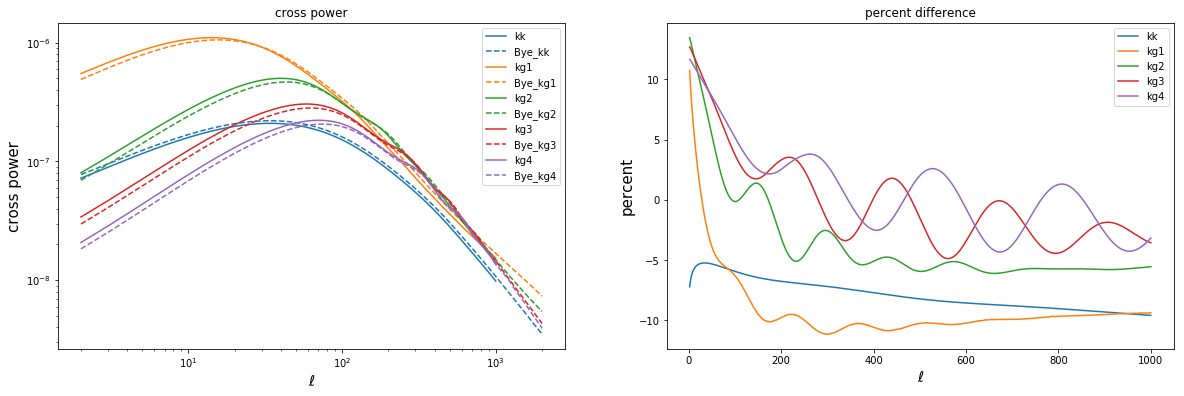

In [14]:
# plot kappa cross galaxy spectra
#%matplotlib notebook
f, axarr = plt.subplots(1,2,figsize=(20,6))
print Fobj.crossCls.shape
# auto power are on diagonal
print nMaps
labels = ['kk','kg1','kg2','kg3','kg4']
bEllsMax = ells.size
for mapNum in range(nMaps):
    ZcrossCls = Fobj.crossCls[0,mapNum]
    if mapNum == 0:
        BcrossCls = cl_kk
    else:
        BcrossCls = cl_kg[mapNum-1]
        
        
    plt.sca(axarr[0])
    plt.loglog(ells,ZcrossCls,label=labels[mapNum],color='C{0}'.format(mapNum))
    plt.loglog(bElls,BcrossCls,label='Bye_'+labels[mapNum],linestyle='--',color='C{0}'.format(mapNum))
    
    plt.sca(axarr[1])
    plt.plot(ells,(ZcrossCls-BcrossCls[:bEllsMax])*100/ZcrossCls,color='C{0}'.format(mapNum),label=labels[mapNum])
    
    
plt.sca(axarr[0])
plt.xlabel(r'$\ell$',fontsize=15)
plt.ylabel('cross power',fontsize=15)
plt.title('cross power')
plt.legend()

plt.sca(axarr[1])
plt.xlabel(r'$\ell$',fontsize=15)
plt.ylabel('percent',fontsize=15)
plt.title('percent difference')
plt.legend()


plt.show()

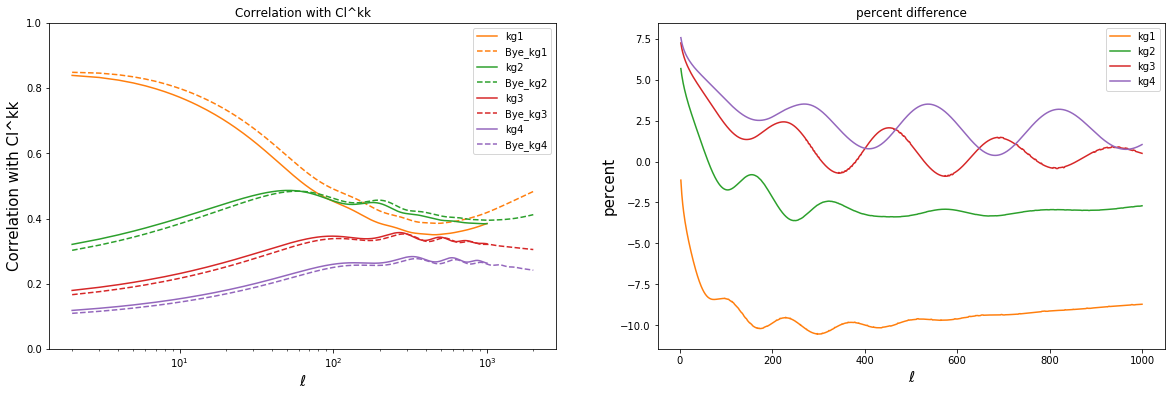

In [15]:
#plot correlation coefficients
#%matplotlib notebook
f, axarr = plt.subplots(1,2,figsize=(20,6))
labels = ['kk','kg1','kg2','kg3','kg4']
bEllsMax = ells.size
for mapNum in range(1,nMaps):
    Clkg = Fobj.crossCls[0,mapNum]
    Clkk = Fobj.crossCls[0,0]
    Clgg = Fobj.crossCls[mapNum,mapNum]
    r = Clkg/np.sqrt(Clkk*Clgg)
    Br = cl_kg[mapNum-1]/np.sqrt(cl_kk*cl_gg[mapNum-1])
             
    plt.sca(axarr[0])
    plt.semilogx(ells,r,label=labels[mapNum],color='C{0}'.format(mapNum))
    plt.semilogx(bElls,Br,label='Bye_'+labels[mapNum],linestyle='--',color='C{0}'.format(mapNum))
    
    plt.sca(axarr[1])
    plt.plot(ells,(r-Br[:bEllsMax])*100/r,color='C{0}'.format(mapNum),label=labels[mapNum])
    
plt.sca(axarr[0])
plt.xlabel(r'$\ell$',fontsize=15)
plt.ylabel('Correlation with Cl^kk',fontsize=15)
plt.ylim([0,1])
plt.title('Correlation with Cl^kk')
plt.legend()

plt.sca(axarr[1])
plt.xlabel(r'$\ell$',fontsize=15)
plt.ylabel('percent',fontsize=15)
plt.title('percent difference')
plt.legend()


plt.show()

In [16]:
# Lloyd asks: why are dCl^gigi/dtau deriv.s nonzero?
# This is the case in both my and B's tau deriv.s
# Look at Cl(tau_fiducial)  and Cl(tau_f +dtau) and Cl(tau_f -dtau)
# also check the CAMB param output. Check myPk.pars after initialization.
reload(cp)

tauFiducial = 0.063
deltaTau = 0.020
tauPlus  = tauFiducial + deltaTau
tauMinus = tauFiducial - deltaTau

# set the variables to get the power spectrum of
from camb import model
#myVar = model.Transfer_tot # for total delta
myVar = model.Transfer_nonu # without nu

# use these for fixed cosmomc_theta
#myPkFid = cp.MatterPower(tau=tauFiducial,myVar1=myVar,myVar2=myVar)
#myPkPlus = cp.MatterPower(tau=tauPlus,myVar1=myVar,myVar2=myVar)
#myPkMinus = cp.MatterPower(tau=tauMinus,myVar1=myVar,myVar2=myVar)

# use these for fixed H0
myPkFid = cp.MatterPower(H0=67.51,cosmomc_theta=None,tau=tauFiducial,myVar1=myVar,myVar2=myVar)
myPkPlus = cp.MatterPower(H0=67.51,cosmomc_theta=None,tau=tauPlus,myVar1=myVar,myVar2=myVar)
myPkMinus = cp.MatterPower(H0=67.51,cosmomc_theta=None,tau=tauMinus,myVar1=myVar,myVar2=myVar)

parsFid = myPkFid.pars
parsPlus = myPkPlus.pars
parsMinus = myPkMinus.pars

print 'done'

zs.size:  9998


zs.size:  9998


zs.size:  9998
done


In [17]:
help(parsFid)

Help on CAMBparams in module camb.model object:

class CAMBparams(camb.baseconfig.CAMB_Structure)
 |  Object storing the parameters for a CAMB calculation, including cosmological parameters and
 |  settings for what to calculate. When a new object is instantiated, default parameters are set automatically.
 |  
 |  Method resolution order:
 |      CAMBparams
 |      camb.baseconfig.CAMB_Structure
 |      _ctypes.Structure
 |      _ctypes._CData
 |      __builtin__.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self)
 |  
 |  copy(self)
 |      Make independent copy.
 |       :return: copy of self
 |  
 |  get_omega_k(self)
 |      Get curvature parameter Omega_k
 |      
 |      :return: Omega_k
 |  
 |  get_zre(self)
 |  
 |  primordial_power(self, k, ix)
 |  
 |  scalar_power(self, k)
 |  
 |  set_accuracy(self, AccuracyBoost=1.0, lSampleBoost=1.0, lAccuracyBoost=1.0, HighAccuracyDefault=True, DoLateRadTruncation=True)
 |      Set parameters determining calculation accuracy (

In [18]:
#print parsFid.tau0
#print parsPlus.tau0
#print parsMinus.tau0

print parsFid.Reion
print parsPlus.Reion
print parsMinus.Reion

#print parsFid.Recomb
#print parsPlus.Recomb
#print parsMinus.Recomb

#print parsFid.ReionHist
#print parsPlus.ReionHist
#print parsMinus.ReionHist

#print parsFid.DerivedParameters
#print parsPlus.DerivedParameters
#print parsMinus.DerivedParameters

print parsFid.H0
print parsPlus.H0
print parsMinus.H0

#print parsFid.InitialConditionVector[0]
#print parsPlus.InitialConditionVector[0]
#print parsMinus.InitialConditionVector[0]

#print parsFid.YHe
#print parsPlus.YHe
#print parsMinus.YHe

print parsFid.omegab
print parsPlus.omegab
print parsMinus.omegab

print parsFid.omegac
print parsPlus.omegac
print parsMinus.omegac

print parsFid.omegan
print parsPlus.omegan
print parsMinus.omegan

print parsFid.omegav
print parsPlus.omegav
print parsMinus.omegav


Reionization = 1
use_optical_depth = 1
redshift = 10.0
delta_redshift = 0.5
fraction = -1.0
optical_depth = 0.063
helium_redshift = 3.5
helium_delta_redshift = 0.5
helium_redshiftstart = 5.0

Reionization = 1
use_optical_depth = 1
redshift = 10.0
delta_redshift = 0.5
fraction = -1.0
optical_depth = 0.083
helium_redshift = 3.5
helium_delta_redshift = 0.5
helium_redshiftstart = 5.0

Reionization = 1
use_optical_depth = 1
redshift = 10.0
delta_redshift = 0.5
fraction = -1.0
optical_depth = 0.043
helium_redshift = 3.5
helium_delta_redshift = 0.5
helium_redshiftstart = 5.0

67.51
67.51
67.51
0.0488414944523
0.0488414944523
0.0488414944523
0.261760569998
0.261760569998
0.261760569998
0.0014155342228
0.0014155342228
0.0014155342228
0.687982401327
0.687982401327
0.687982401327


In [19]:
print myPkFid.zstar
print myPkPlus.zstar
print myPkMinus.zstar


1088.51223301
1088.99233238
1088.99233238


In [20]:
print myPkFid.zArray[0]
print myPkPlus.zArray[0]
print myPkMinus.zArray[0]

print myPkFid.kArray[0]
print myPkPlus.kArray[0]
print myPkMinus.kArray[0]


plt.plot(myPkFid.zArray,"b.")
plt.plot(myPkPlus.zArray,"g.")
plt.plot(myPkMinus.zArray,"r.")
plt.title('redshift values used in P(z,k) interpolator')
plt.xlabel('z')
plt.show()

plt.plot(myPkFid.kArray,"b.")
plt.plot(myPkPlus.kArray,"g.")
plt.plot(myPkMinus.kArray,"r.")
plt.title('wavenumbers used in P(z,k) interpolator')
plt.xlabel('k')
plt.show()

plt.loglog(myPkFid.zArray,"b.")
plt.loglog(myPkPlus.zArray,"g.")
plt.loglog(myPkMinus.zArray,"r.")
plt.title('redshift values used in P(z,k) interpolator')
plt.xlabel('z')
plt.show()

plt.loglog(myPkFid.kArray,"b.")
plt.loglog(myPkPlus.kArray,"g.")
plt.loglog(myPkMinus.kArray,"r.")
plt.title('wavenumbers used in P(z,k) interpolator')
plt.xlabel('k')
plt.show()

AttributeError: MatterPower instance has no attribute 'zArray'

In [21]:
plt.plot(myPkPlus.zArray-myPkFid.zArray,"g.")
plt.plot(myPkFid.zArray-myPkMinus.zArray,"r.")
plt.ylim([-1e-9,1e-9])
plt.title('redshift value differences used in P(z,k) interpolator')
plt.xlabel('delta z')
plt.show()

plt.plot(myPkPlus.kArray-myPkFid.kArray,"g.")
plt.plot(myPkFid.kArray-myPkMinus.kArray,"r.")
plt.ylim([-1e-9,1e-9])
plt.title('wavenumber differences used in P(z,k) interpolator')
plt.xlabel('delta k')
plt.show()

AttributeError: MatterPower instance has no attribute 'zArray'

In [22]:
# Zhen asks: When varying mnu, how do you keep cosmomc_theta constant?

# Look at Cl(mnu_fiducial)  and Cl(mnu_f +dmnu) and Cl(mnu_f -dmnu)
# also check the CAMB param output. Check myPk.pars after initialization.
reload(cp)

tauFiducial = 0.063
deltaTau = 0.020
tauPlus  = tauFiducial + deltaTau
tauMinus = tauFiducial - deltaTau

# set the variables to get the power spectrum of
from camb import model
#myVar = model.Transfer_tot # for total delta
myVar = model.Transfer_nonu # without nu

# use these for fixed cosmomc_theta
#myPkFid = cp.MatterPower(tau=tauFiducial,myVar1=myVar,myVar2=myVar)
#myPkPlus = cp.MatterPower(tau=tauPlus,myVar1=myVar,myVar2=myVar)
#myPkMinus = cp.MatterPower(tau=tauMinus,myVar1=myVar,myVar2=myVar)

# use these for fixed H0
myPkFid = cp.MatterPower(H0=67.51,cosmomc_theta=None,tau=tauFiducial,myVar1=myVar,myVar2=myVar)
myPkPlus = cp.MatterPower(H0=67.51,cosmomc_theta=None,tau=tauPlus,myVar1=myVar,myVar2=myVar)
myPkMinus = cp.MatterPower(H0=67.51,cosmomc_theta=None,tau=tauMinus,myVar1=myVar,myVar2=myVar)

parsFid = myPkFid.pars
parsPlus = myPkPlus.pars
parsMinus = myPkMinus.pars

print 'done'

zs.size:  9998


zs.size:  9998


zs.size:  9998
done


In [23]:
#plot power spectra
# try matter power spectra ratios
kSpectrum = np.logspace(-3.7,1.0,1000)

myZs = np.linspace(0,4,17)
#myZ = 0
Pk0s = []
Pk1s = []
Pk2s = []
#Pk3s = []

PKinterp0 = myPkFid.PK
PKinterp1 = myPkPlus.PK
PKinterp2 = myPkMinus.PK
#PKinterp3 = myPk3.PK
for myZ in myZs:
    Pk0 = PKinterp0.P(myZ,kSpectrum)
    Pk1 = PKinterp1.P(myZ,kSpectrum)
    Pk2 = PKinterp2.P(myZ,kSpectrum)
    #Pk3 = PKinterp3.P(myZ,kSpectrum)
    #print 'sizes: ',kSpectrum.size,Pk0.size,Pk1.size,Pk2.size,Pk3.size
    Pk0s.append(Pk0)
    Pk1s.append(Pk1)
    Pk2s.append(Pk2)
    #Pk3s.append(Pk3)
print 'done interpolating Pk.s'

done interpolating Pk.s


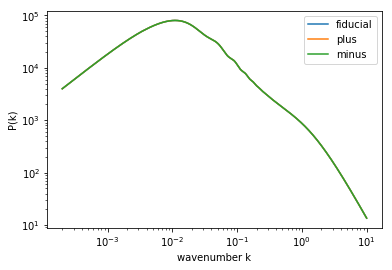

In [24]:
# look at the z=0 one
#%matplotlib inline
plt.loglog(kSpectrum,Pk0s[0],label='fiducial')
plt.loglog(kSpectrum,Pk1s[0],label='plus')
plt.loglog(kSpectrum,Pk2s[0],label='minus')
#plt.loglog(kSpectrum,Pk3s[0])
plt.xlabel('wavenumber k')
plt.ylabel('P(k)')
plt.legend()
plt.show();

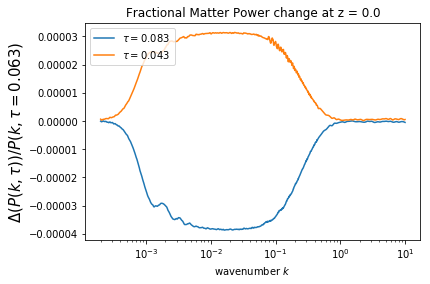

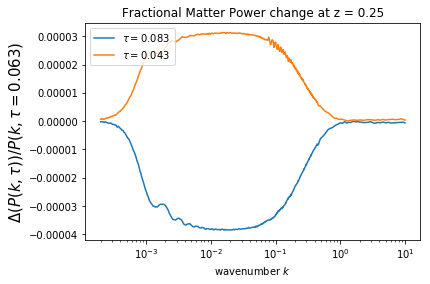

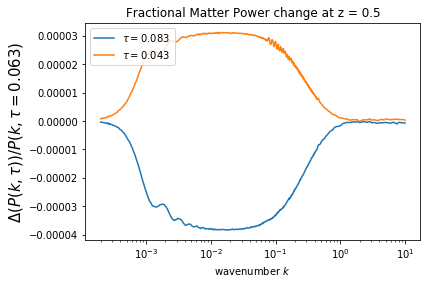

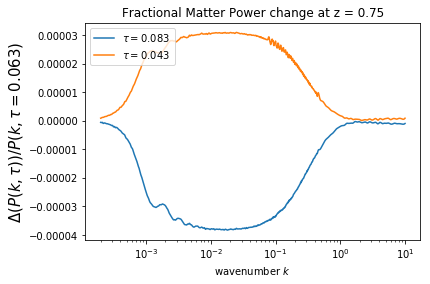

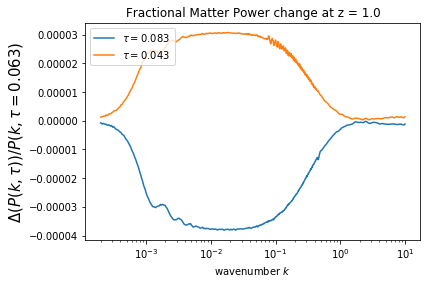

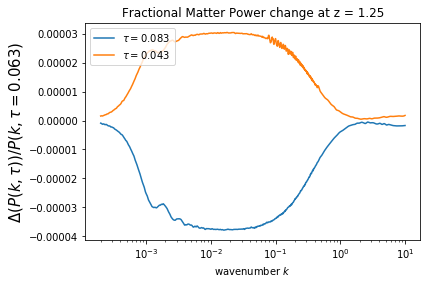

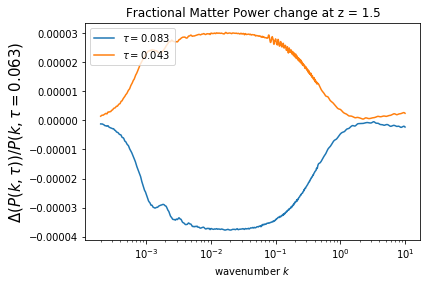

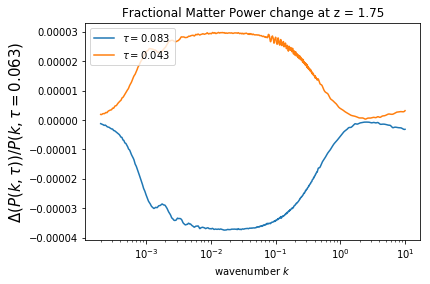

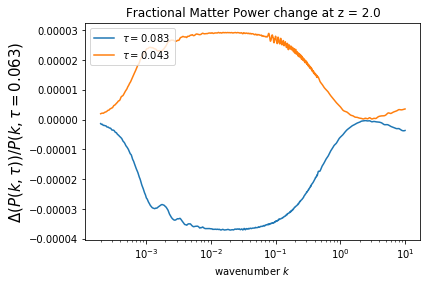

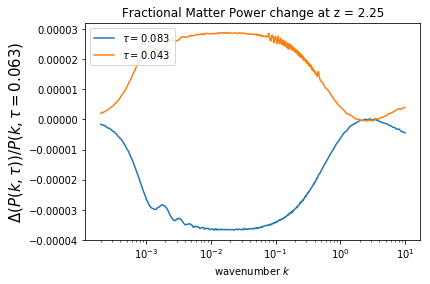

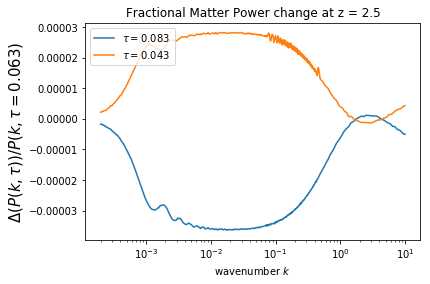

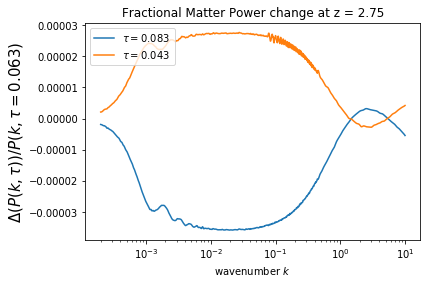

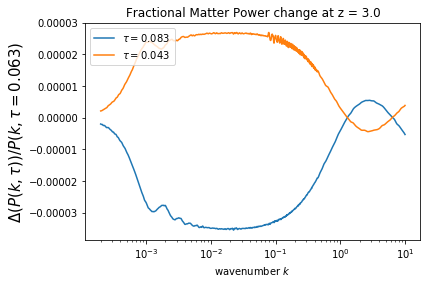

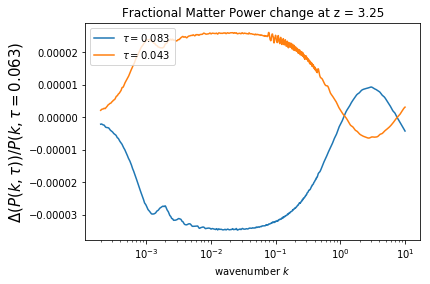

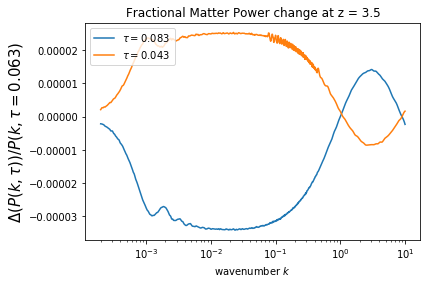

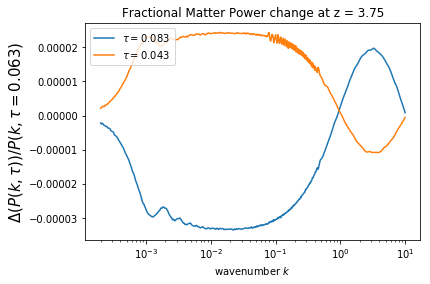

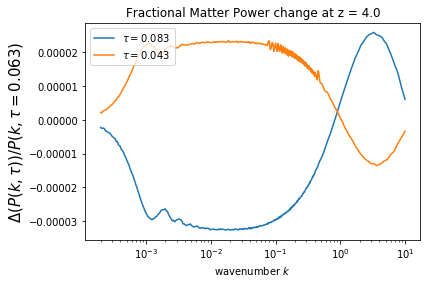

In [25]:
# plot fractional changes
#%matplotlib inline
labels = [r'$\tau = 0.083$',r'$\tau = 0.043$']
for i,myZ in enumerate(myZs):
    Pks = (Pk1s[i],Pk2s[i])  #,Pk3s[i])
    for pkNum in range(2):  #3):
        t = (Pks[pkNum]-Pk0s[i])/Pk0s[i]
        plt.semilogx(kSpectrum,t,label=labels[pkNum])
        plt.ylabel(r'$\Delta(P(k,\tau))/P(k,\tau = 0.063) $',fontsize=15)
        plt.xlabel(r'wavenumber $k$')
        plt.title('Fractional Matter Power change at z = {0}'.format(myZ))
        #plt.ylim([-0.23,0.02])
    plt.legend(loc='upper left')
    plt.show();

In [26]:
import camb
from camb import model, initialpower
help(model)

Help on module camb.model in camb:

NAME
    camb.model

FILE
    /opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/camb/model.py

CLASSES
    camb.baseconfig.CAMB_Structure(_ctypes.Structure)
        CAMBparams
        TransferParams
    
    class CAMBparams(camb.baseconfig.CAMB_Structure)
     |  Object storing the parameters for a CAMB calculation, including cosmological parameters and
     |  settings for what to calculate. When a new object is instantiated, default parameters are set automatically.
     |  
     |  Method resolution order:
     |      CAMBparams
     |      camb.baseconfig.CAMB_Structure
     |      _ctypes.Structure
     |      _ctypes._CData
     |      __builtin__.object
     |  
     |  Methods defined here:
     |  
     |  __init__(self)
     |  
     |  copy(self)
     |      Make independent copy.
     |       :return: copy of self
     |  
     |  get_omega_k(self)
     |      Get curvature parameter Omega_k
     |  

(200, 6)
0.0001 100.0


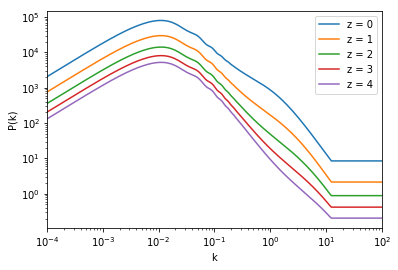

In [28]:
# look at P(z,k) at agreed upon z and cosparams

# set cosmological parameters
cosParams = {
        'H0'    : None, #67.51, #setting H0=None allows cosmomc_theta to be used instead
        'cosmomc_theta'           : 1.04087e-2,
        'ombh2' : 0.02226,
        'omch2' : 0.1193,
        'omk'   : 0,
        'tau'   : 0.063,

        'As'    : 2.130e-9,
        'ns'    : 0.9653,
        'r'     : 0,
        'kPivot': 0.05,
    
        'w'     : -1,

        # if fiducial mnu is changed, need to adjust omch2 as well
        'mnu'   : 0.06, # (eV)
        #'mnu'   : 0.058, # Lloyd suggested this value for fiducial; adjust omch2 if I do use it
        'nnu'   : 3.046,
        'standard_neutrino_neff'  : 3.046,
        'num_massive_neutrinos'   : 1,
        'neutrino_hierarchy'      : 'normal'}

# load Byeonghee's P(k) file
BPk = np.loadtxt('Byeonghee_dat/Pk.dat')
print BPk.shape
print BPk[0,0],BPk[-1,0]

#%matplotlib notebook
plt.loglog(BPk[:,0],BPk[:,1],label='z = 0')
plt.loglog(BPk[:,0],BPk[:,2],label='z = 1')
plt.loglog(BPk[:,0],BPk[:,3],label='z = 2')
plt.loglog(BPk[:,0],BPk[:,4],label='z = 3')
plt.loglog(BPk[:,0],BPk[:,5],label='z = 4')
plt.xlabel('k')
plt.xlim([1.e-4,1.e+2])
plt.ylabel('P(k)')
plt.legend()
plt.show()

In [30]:
import crosspower as cp
myPk = cp.MatterPower(**cosParams)
print 'done'

zs.size:  9998
done


In [31]:
kRange = BPk[:,0]
P0 = myPk.PK.P(0,kRange)
P1 = myPk.PK.P(1,kRange)
P2 = myPk.PK.P(2,kRange)
P3 = myPk.PK.P(3,kRange)
P4 = myPk.PK.P(4,kRange)

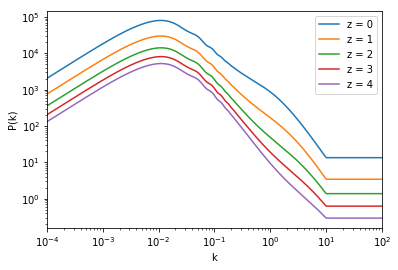

In [32]:
#%matplotlib notebook
plt.loglog(kRange,P0,label='z = 0')
plt.loglog(kRange,P1,label='z = 1')
plt.loglog(kRange,P2,label='z = 2')
plt.loglog(kRange,P3,label='z = 3')
plt.loglog(kRange,P4,label='z = 4')
plt.xlabel('k')
plt.xlim([1.e-4,1.e+2])
plt.ylabel('P(k)')
plt.legend()
plt.show()

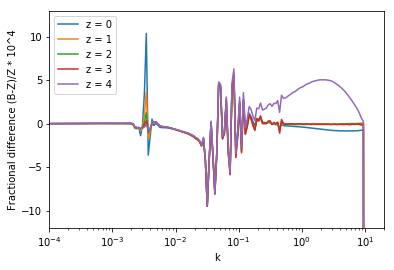

In [33]:
# fractional differences
#%matplotlib notebook
plt.semilogx(BPk[:,0],(BPk[:,1]-P0)/P0*1e4,label='z = 0')
plt.semilogx(BPk[:,0],(BPk[:,2]-P1)/P1*1e4,label='z = 1')
plt.semilogx(BPk[:,0],(BPk[:,3]-P2)/P2*1e4,label='z = 2')
plt.semilogx(BPk[:,0],(BPk[:,4]-P3)/P3*1e4,label='z = 3')
plt.semilogx(BPk[:,0],(BPk[:,5]-P4)/P4*1e4,label='z = 4')
plt.xlabel('k')
plt.ylabel('Fractional difference (B-Z)/Z * 10^4')
plt.xlim([1e-4,2e1])
plt.ylim([-12,13])
plt.legend()
plt.show()

In [34]:
print myPk.kmax
print 'this is the max k that I integrate to in getCl'

10
this is the max k that I integrate to in getCl
